In [1]:
from src.data import load_jsonl_part

items_df = load_jsonl_part('../data/processed/cleaned_items_df.jsonl', nrows=500000)
reviews_df = load_jsonl_part('../data/processed/cleaned_reviews_df.jsonl', nrows=5000000)

In [2]:
merged_df = reviews_df.merge(items_df, on='parent_asin', how='inner')

In [3]:
merged_df.head(20)

,rating,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,main_category,title,average_rating,rating_number,features,description,price,store,categories,details,subtitle,author
0,5,B00YQ6X8EO,B00YQ6X8EO,AGKHLEW2SOWHNMFQIJGBECAF7INQ,2020-05-05 14:08:48.923,0,True,All Beauty,Herbivore - Natural Sea Mist Texturizing Salt ...,4.3,384,[],"[If given the choice, weÕd leave most telltale...",27.17,HERBIVORE,[],"{'Hair Type': 'Wavy', 'Material Type Free': 'D...",NaN,NaN
1,4,B081TJ8YS3,B081TJ8YS3,AGKHLEW2SOWHNMFQIJGBECAF7INQ,2020-05-04 18:10:55.070,1,True,All Beauty,All Natural Vegan Dry Shampoo Powder - Eco Fri...,4.0,56,[],[],27.17,Two Goats Apothecary,[],"{'Brand': 'Two Goats Apothecary', 'Item Form':...",NaN,NaN
2,5,B07PNNCSP9,B097R46CSY,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,2020-05-16 21:41:06.052,2,True,All Beauty,New Road Beauty - Creamsicle - Variety 3 Pack ...,4.4,699,"[Same Great Product, NEW PACKAGING., MOISTURIZ...",[New Road Beauty Paraffin Wax is recommended f...,21.98,New Road Beauty,[],{'Package Dimensions': '10.5 x 6.4 x 1.6 inche...,NaN,NaN
3,1,B09JS339BZ,B09JS339BZ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,2022-01-28 18:13:50.220,0,True,All Beauty,muaowig Ombre Body Wave Bundles 1B Grey Human ...,1.0,1,[?Hair Bundle Material?:Brazilian Virgin Human...,[Hair Material: Brazilian Virgin Human Hair Bu...,27.17,muaowig,[],"{'Brand': 'muaowig', 'Material': 'Human Hair',...",NaN,NaN
4,5,B08BZ63GMJ,B08BZ63GMJ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,2020-12-30 10:02:43.534,0,True,All Beauty,Yinhua Electric Nail Drill Kit Portable Profes...,3.5,20,[],[],27.17,Yinhua,[],{'Package Dimensions': '8.5 x 3.82 x 2.24 inch...,NaN,NaN
5,4,B00R8DXL44,B00R8DXL44,AGMJ3EMDVL6OWBJF7CA5RGJLXN5A,2020-08-27 22:30:08.138,0,True,All Beauty,"China Glaze Nail Polish, Wanderlust 1381",3.8,32,[Light lavender pink nail color with golden sh...,"[China Glaze Nail Polish, Wanderlust, 1381, .5...",7.10,China Glaze,[],"{'Brand': 'China Glaze', 'Item Form': 'Liquid'...",NaN,NaN
6,5,B099DRHW5V,B099DRHW5V,AHREXOGQPZDA6354MHH4ETSF3MCQ,2021-09-17 13:31:59.443,0,True,All Beauty,"Disposable Facial Cotton Tissue, 100PCS Cotton...",3.5,4,[],[],27.17,AYQNMHR,[],{'Package Dimensions': '8.58 x 4.37 x 3.27 inc...,NaN,NaN
7,3,B088SZDGXG,B08BBQ29N5,AEYORY2AVPMCPDV57CE337YU5LXA,2021-10-15 05:20:59.292,0,True,All Beauty,Niseyo new Faux Locs 24 Inch Crochet Hair 6 Pa...,4.3,62,[],[],27.17,Niseyo,[],"{'Brand': 'Niseyo', 'Extension Length': '24 In...",NaN,NaN
8,5,B08P2DZB4X,B08P2DZB4X,AFSKPY37N3C43SOI5IEXEK5JSIYA,2021-07-27 13:04:04.559,0,False,All Beauty,NIRA Skincare Laser & Serum Bundle - Includes ...,3.8,109,[POWERFUL ANTI-AGING DUO - This powerful anti-...,[],27.17,Nira,[],"{'Skin Type': 'Dry', 'Product Benefits': 'Hydr...",NaN,NaN
9,5,B086QY6T7N,B086QY6T7N,AFSKPY37N3C43SOI5IEXEK5JSIYA,2021-07-18 13:21:51.145,0,False,All Beauty,Caroline Keller Keratin Shampoo for dry and da...,3.5,12,[],[],27.17,Caroline Keller,[],"{'Brand': 'Caroline Keller', 'Item Form': 'Liq...",NaN,NaN


In [4]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

df2 = merged_df.copy()

# --- Behavioral features per user ---
user_behavior = (
    df2.groupby("user_id")
    .agg(
        n_purchases=("parent_asin", "size"),
        n_products=("parent_asin", "nunique"),
        mean_rating=("rating", "mean"),
        std_rating=("rating", "std"),
        mean_helpful=("helpful_vote", "mean"),
        mean_price=("price", "mean"),
    )
    .reset_index()
)

user_behavior["std_rating"] = user_behavior["std_rating"].fillna(0)
user_behavior["mean_price"] = user_behavior["mean_price"].fillna(0)

# reduce skew of counts/helpful votes/price
user_behavior["log_purchases"] = np.log1p(user_behavior["n_purchases"])
user_behavior["log_helpful"] = np.log1p(user_behavior["mean_helpful"])
user_behavior["log_price"] = np.log1p(user_behavior["mean_price"])

# --- B) "What they buy": category distribution per user ---
# counts of purchases per (user, category)
user_cat_counts = (
    df2.groupby(["user_id", "main_category"])
    .size()
    .rename("cat_count")
    .reset_index()
)

# pivot to wide: one column per category
user_cat_wide = (
    user_cat_counts.pivot(index="user_id", columns="main_category",
                          values="cat_count")
    .fillna(0)
)

# convert counts to shares (so heavy buyers don't dominate purely by volume)
user_cat_share = user_cat_wide.div(user_cat_wide.sum(axis=1), axis=0).fillna(0)
user_cat_share.columns = [f"cat_share__{c}" for c in user_cat_share.columns]
user_cat_share = user_cat_share.reset_index()

# --- Combine features ---
user_features = user_behavior.merge(user_cat_share, on="user_id",
                                    how="left").fillna(0)

# Select feature columns (exclude user_id)
feature_cols = [c for c in user_features.columns if c != "user_id"]

X = user_features[feature_cols].to_numpy()

# Scale features
X_scaled = StandardScaler().fit_transform(X)

# Cluster (pick k)
k = 5
model = KMeans(n_clusters=k, random_state=42, n_init="auto")
user_features["cluster"] = model.fit_predict(X_scaled)

# --- Merge cluster labels back to the purchase-level dataset ---
df_with_clusters = df2.merge(user_features[["user_id", "cluster"]],
                             on="user_id", how="left")

# Now you can "display clusters inside the dataset"
df_with_clusters["cluster"].value_counts().sort_index()


cluster
0    1336473
1     779336
2       2271
3     555620
4    1272469
Name: count, dtype: int64

In [5]:
(df_with_clusters
 .sort_values(["cluster"])
 .groupby("cluster")
 .head(5)[["cluster", "user_id", "parent_asin", "main_category", "rating", "verified_purchase", "price"]]
)

,cluster,user_id,parent_asin,main_category,rating,verified_purchase,price
34,0,AFZUK3MTBIBEDQOPAK3OATUOUKLA,B082FLP15V,All Beauty,3,True,27.17
35,0,AFZUK3MTBIBEDQOPAK3OATUOUKLA,B0020MKBNW,All Beauty,5,True,57.81
3946129,0,AHKPXIBJV3WSEMVIEPR44RJG4GZA,B000MTDRJA,Digital Music,5,False,13.98
3946130,0,AERHB5NPRAN7BA3NDPEZ6QQGKLJA,B000056Q3W,Digital Music,5,True,36.09
3946131,0,AERHB5NPRAN7BA3NDPEZ6QQGKLJA,B000OZ2CKC,Digital Music,3,False,29.00
1336474,1,AGWX5O2Y3FQC6UC7BOB5LTJRYWPA,B071DY5953,Appliances,5,True,199.88
1336531,1,AHDTLTZKZXQ2GRO3RJCFUBOVXMZA,B08YBGCNHP,Tools & Home Improvement,5,True,109.00
1336532,1,AG6WBEWOYN2EIROT5XDS6MDYQPBA,B07SBW92N5,Tools & Home Improvement,4,True,17.08
1336533,1,AGA2YJVPAG43RJO7P5EJ6E2AV7SQ,B0BVR77MZJ,Tools & Home Improvement,5,True,4.99
1336534,1,AFHZITENT5UAXUF6BVXOKDQ73RTQ,B07RJWDTJ3,Appliances,5,True,15.77


In [6]:
(user_features
 .groupby("cluster")[["n_purchases", "n_products", "mean_rating", "mean_helpful"]]
 .mean()
 .round(3)
 .sort_index()
)

,n_purchases,n_products,mean_rating,mean_helpful
cluster,,,,
0,3.073,3.072,4.522,1.130
1,1.255,1.254,4.290,0.402
2,1.200,1.200,4.272,1.540
3,1.159,1.159,4.034,1.833
4,1.113,1.112,4.067,0.778


In [7]:
cat_cols = [c for c in user_features.columns if c.startswith("cat_share__")]

(user_features
 .groupby("cluster")[cat_cols]
 .mean()
 .apply(lambda s: s.sort_values(ascending=False).head(5), axis=1)
)

,cat_share__All Beauty,cat_share__Amazon Home,cat_share__Appliances,cat_share__Cell Phones & Accessories,cat_share__Digital Music,cat_share__Grocery,cat_share__Industrial & Scientific,cat_share__Movies & TV,cat_share__Tools & Home Improvement
cluster,,,,,,,,,
0,0.029267,0.032149,0.021021,NaN,0.864634,NaN,NaN,NaN,0.031653
1,0.009136,0.020026,0.022930,NaN,NaN,NaN,0.006091,NaN,0.938788
2,0.012150,0.017697,0.030375,0.902272,NaN,NaN,NaN,NaN,0.024300
3,0.008002,0.015118,0.935941,NaN,NaN,NaN,0.015401,NaN,0.018968
4,0.492083,0.379556,NaN,NaN,NaN,0.007838,0.057602,0.006758,NaN


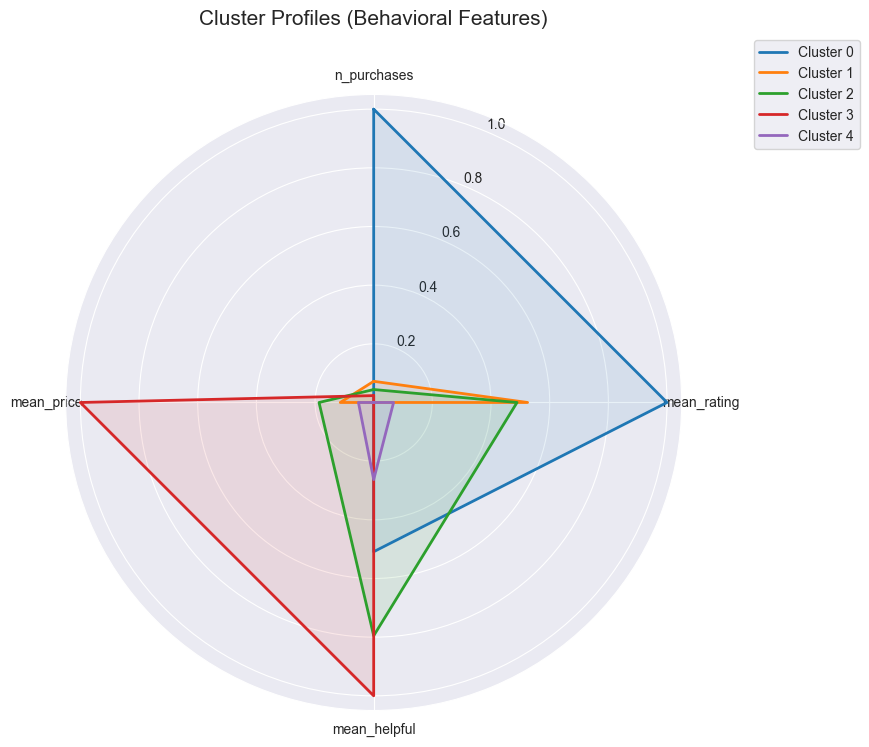

In [8]:
# ... existing code ...
import matplotlib.pyplot as plt
import numpy as np

# Prepare data: mean features per cluster (using the behavioral ones)
features_to_plot = ["n_purchases", "mean_rating", "mean_helpful", "mean_price"]
cluster_stats = user_features.groupby("cluster")[features_to_plot].mean()

# Scale data between 0 and 1 for the radar chart comparison
stats_min = cluster_stats.min()
stats_max = cluster_stats.max()
cluster_stats_scaled = (cluster_stats - stats_min) / (stats_max - stats_min)

# Radar Chart Setup
labels = cluster_stats.columns
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1] # Close the loop

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

for i, row in cluster_stats_scaled.iterrows():
    values = row.values.flatten().tolist()
    values += values[:1] # Close the loop
    ax.plot(angles, values, linewidth=2, label=f'Cluster {i}')
    ax.fill(angles, values, alpha=0.1)

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), labels)
plt.title('Cluster Profiles (Behavioral Features)', size=15, y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()

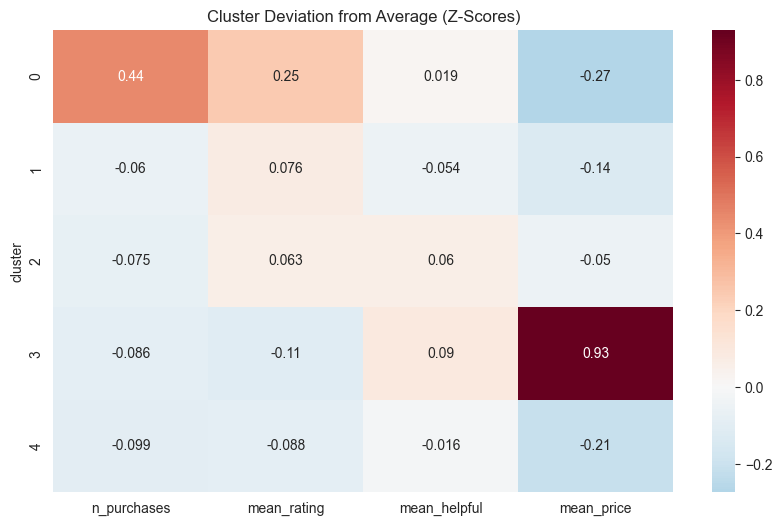

In [9]:
import seaborn as sns

# Calculate mean and std of features across the whole population
global_mean = user_features[feature_cols].mean()
global_std = user_features[feature_cols].std()

# Calculate Z-score for each cluster mean: (Cluster_Mean - Global_Mean) / Global_Std
cluster_means = user_features.groupby("cluster")[feature_cols].mean()
z_scores = (cluster_means - global_mean) / global_std

# Plot only the behavioral features for clarity
behavioral_cols = ["n_purchases", "mean_rating", "mean_helpful", "mean_price"]
plt.figure(figsize=(10, 6))
sns.heatmap(z_scores[behavioral_cols], annot=True, cmap="RdBu_r", center=0)
plt.title("Cluster Deviation from Average (Z-Scores)")
plt.show()

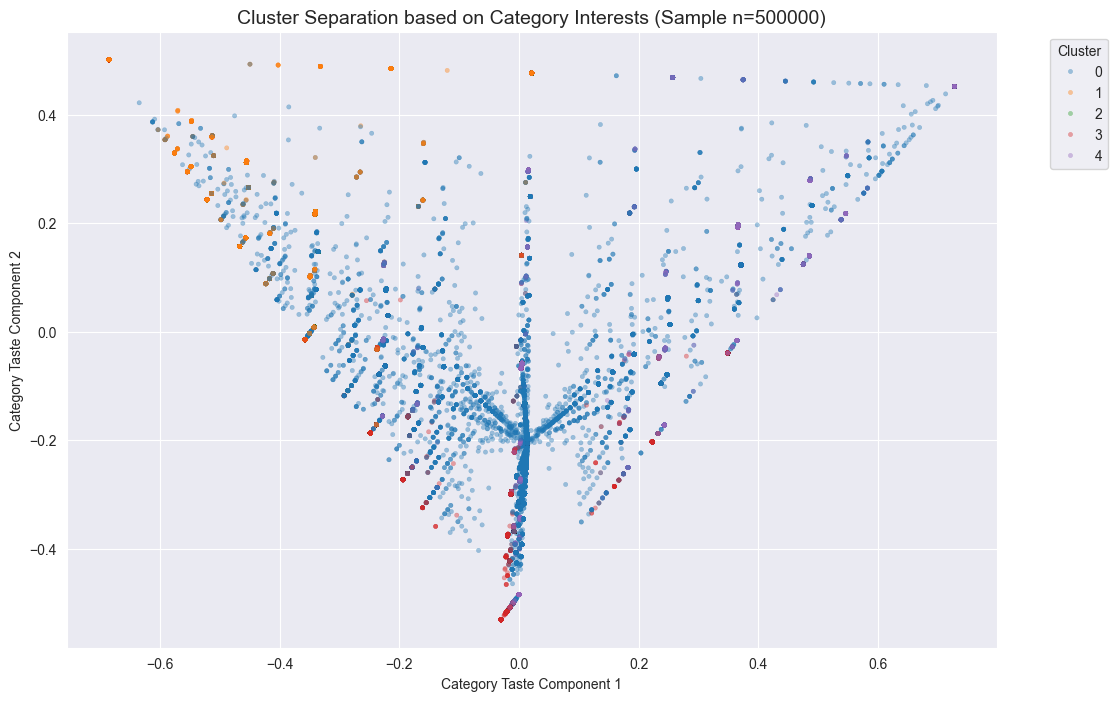

Top categories influencing the horizontal axis (PC1):
All Beauty        0.722760
Digital Music     0.009064
Premium Beauty    0.000178
Name: PC1, dtype: float64


In [10]:
# ... existing code ...
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Isolate only the category share columns
cat_cols = [c for c in user_features.columns if c.startswith("cat_share__")]
X_cats = user_features[cat_cols].to_numpy()

# 2. Use PCA to reduce categories to 2D
# This represents the "Category Space" (Taste/Interest)
pca_cats = PCA(n_components=2)
cats_2d = pca_cats.fit_transform(X_cats)

# 3. Create a temporary dataframe for plotting
plot_df = pd.DataFrame(cats_2d, columns=['Category_PCA1', 'Category_PCA2'])
plot_df['cluster'] = user_features['cluster'].values

# 4. Sample for performance (Large dataset)
sample_n = min(500000, len(plot_df))
plot_df_sample = plot_df.sample(n=sample_n, random_state=42)

# 5. Plot
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=plot_df_sample,
    x='Category_PCA1',
    y='Category_PCA2',
    hue='cluster',
    palette='tab10', # Better contrast for category grouping
    alpha=0.4,
    s=10,
    edgecolor=None
)

plt.title(f"Cluster Separation based on Category Interests (Sample n={sample_n})", fontsize=14)
plt.xlabel("Category Taste Component 1")
plt.ylabel("Category Taste Component 2")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Print what the axes actually represent
loadings = pd.DataFrame(
    pca_cats.components_.T,
    columns=['PC1', 'PC2'],
    index=[c.replace('cat_share__', '') for c in cat_cols]
)
print("Top categories influencing the horizontal axis (PC1):")
print(loadings['PC1'].sort_values(ascending=False).head(3))


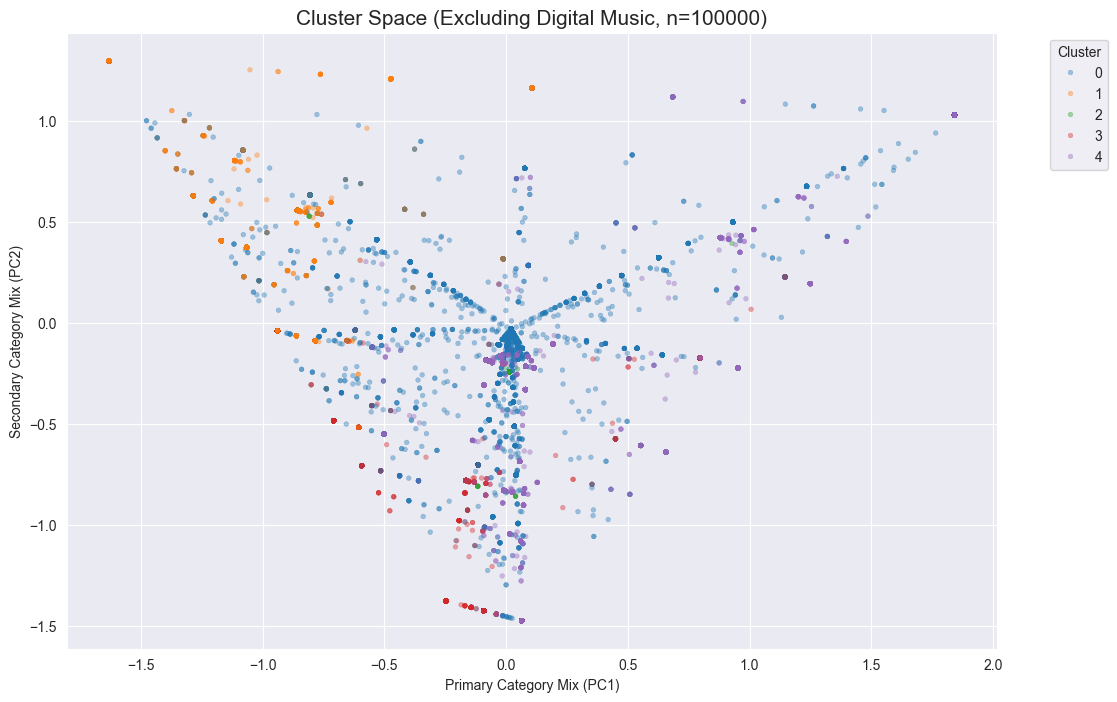

Top categories driving the new X-axis (PC1):
All Beauty                  0.738637
Tools & Home Improvement    0.666379
Appliances                  0.098262
Industrial & Scientific     0.016648
Amazon Home                 0.016485
Name: PC1, dtype: float64


In [11]:
# 1. Select category columns but EXCLUDE Digital Music
cat_cols_filtered = [c for c in user_features.columns
                     if c.startswith("cat_share__")
                     and c != "cat_share__Digital Music"]

X_cats_filtered = user_features[cat_cols_filtered].to_numpy()

# 2. Re-scale this subset (important since we changed the feature space)
X_cats_scaled = StandardScaler().fit_transform(X_cats_filtered)

# 3. PCA to 2D
pca_filtered = PCA(n_components=2)
cats_2d_filtered = pca_filtered.fit_transform(X_cats_scaled)

# 4. Create plotting dataframe
plot_df_filtered = pd.DataFrame(cats_2d_filtered, columns=['PC1', 'PC2'])
plot_df_filtered['cluster'] = user_features['cluster'].values

# 5. Sample for visualization performance
sample_n = min(100000, len(plot_df_filtered))
plot_sample = plot_df_filtered.sample(n=sample_n, random_state=42)

# 6. Plot
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=plot_sample,
    x='PC1',
    y='PC2',
    hue='cluster',
    palette='tab10',
    alpha=0.4,
    s=12,
    edgecolor=None
)

plt.title(f"Cluster Space (Excluding Digital Music, n={sample_n})", fontsize=15)
plt.xlabel("Primary Category Mix (PC1)")
plt.ylabel("Secondary Category Mix (PC2)")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Show which categories now drive the visualization
loadings_filtered = pd.DataFrame(
    pca_filtered.components_.T,
    columns=['PC1', 'PC2'],
    index=[c.replace('cat_share__', '') for c in cat_cols_filtered]
)
print("Top categories driving the new X-axis (PC1):")
print(loadings_filtered['PC1'].abs().sort_values(ascending=False).head(5))


### Interpretation of Cluster Separation (PCA)

The scatter plot above visualizes the distribution of users in a 2D "Category Space" using Principal Component Analysis (PCA).

*   **Axis Interpretation**:
    *   **PC1 (Horizontal Axis)**: Represents the primary source of variance in user interests. Based on the loadings, it is strongly driven by categories like **All Beauty**.
    *   **PC2 (Vertical Axis)**: Represents secondary category preferences.
*   **Cluster Overlap**: There is significant overlap between clusters in this category-only space. This suggests that while clusters were formed using both behavioral features (purchase frequency, ratings, price) and interests, their "tastes" in product categories are not perfectly distinct.
*   **Dense Regions**: The concentrated clusters near the center represent "generalist" users, while those spreading toward the edges have more specialized or extreme category distributions.
*   **Digital Music Filter**: As noted in the preceding analysis, Digital Music was a dominant feature; the visualization explores how clusters differentiate when focusing on other diverse product interests.


In [1]:
# Count users per cluster
cluster_counts = user_features['cluster'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')
plt.title("Number of Users per Cluster")
plt.xlabel("Cluster ID")
plt.ylabel("Count")
plt.show()


NameError: name 'user_features' is not defined